In [1]:
# Installing required libraries
!pip install kagglehub

In [ ]:
# dataset link -> https://www.kaggle.com/datasets/msambare/fer2013

In [2]:
# Downloading the data
import kagglehub

# Downloading
path = kagglehub.dataset_download("msambare/fer2013")
print('Path to dataset files :' , path)

Path to dataset files : /kaggle/input/fer2013


In [3]:
# Step 1 : Install tensorflow
!pip install tensorflow

In [4]:
# Step 2 : Importing important libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout,Flatten, Conv2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from os import walk # Only for counting images

In [5]:
# Step 3: Set Dataset paths
train_data = '/kaggle/input/fer2013/train'
test_data = '/kaggle/input/fer2013/test'

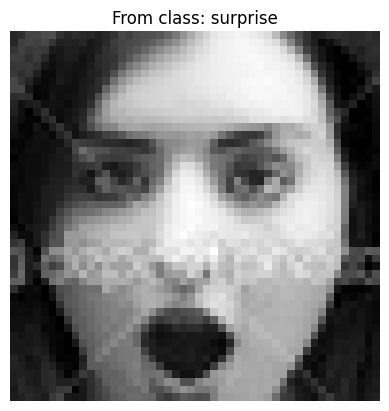

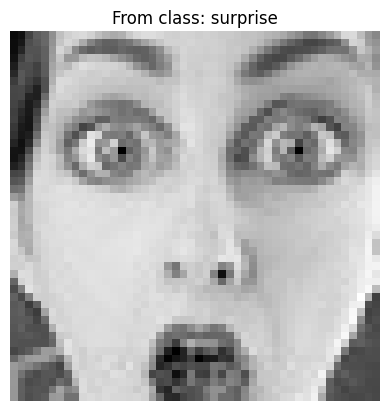

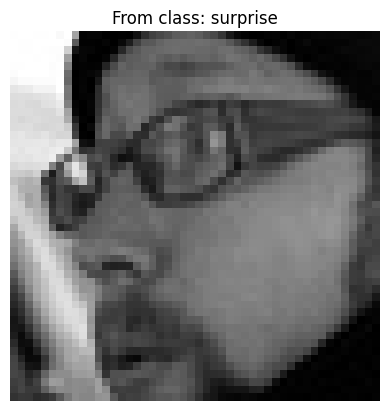

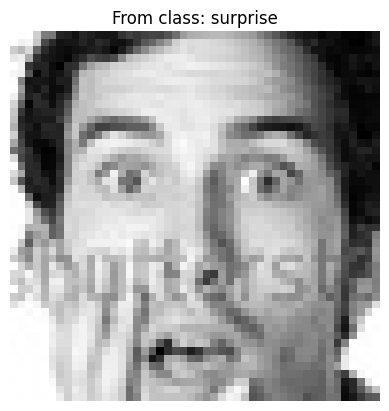

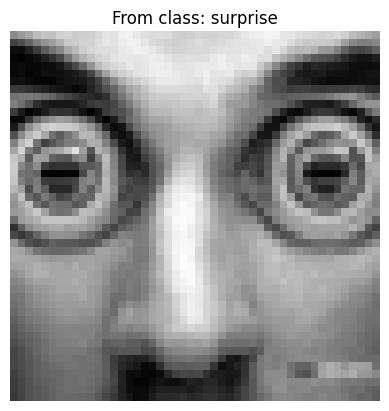

In [11]:
# Preview the images
import matplotlib.pyplot as plt
import os
from PIL import Image

# Manually pick a class and Image
sample_class = os.listdir(train_data)[0]
sample_class_path = os.path.join(train_data, sample_class)

# List the image files inside the class folder
image_files = os.listdir(sample_class_path)

# Load and display the first 2 images
for i in range(5):
    image_path = os.path.join(sample_class_path, image_files[i])
    image = Image.open(image_path).convert('L') # Convert to grayscale
    plt.imshow(image, cmap='gray')
    plt.title(f"From class: {sample_class}")
    plt.axis('off')
    plt.show()

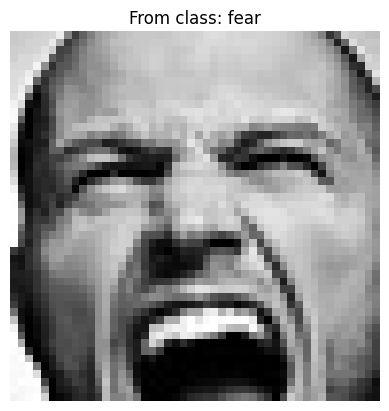

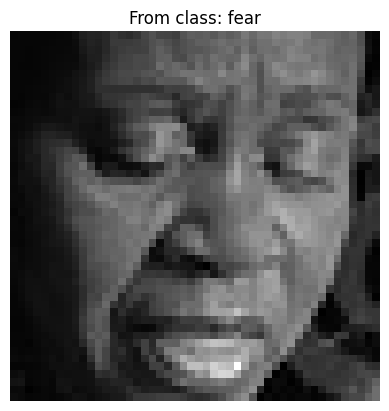

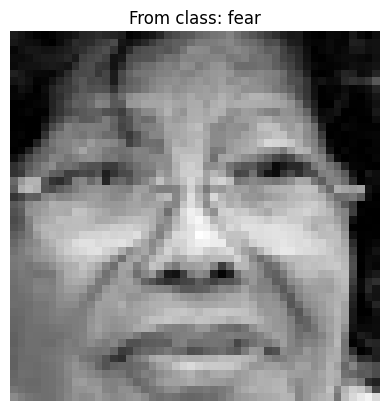

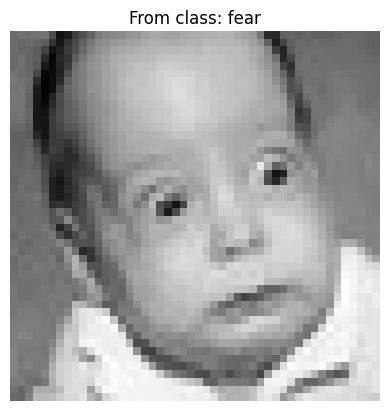

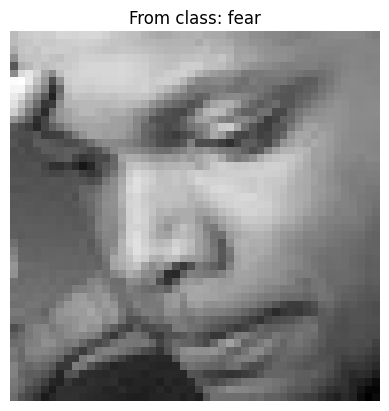

In [12]:
# Preview the images
import matplotlib.pyplot as plt
import os
from PIL import Image

# Manually pick a class and Image
sample_class = os.listdir(train_data)[1]
sample_class_path = os.path.join(train_data, sample_class)

# List the image files inside the class folder
image_files = os.listdir(sample_class_path)

# Load and display the first 2 images
for i in range(5):
    image_path = os.path.join(sample_class_path, image_files[i])
    image = Image.open(image_path).convert('L') # Convert to grayscale
    plt.imshow(image, cmap='gray')
    plt.title(f"From class: {sample_class}")
    plt.axis('off')
    plt.show()

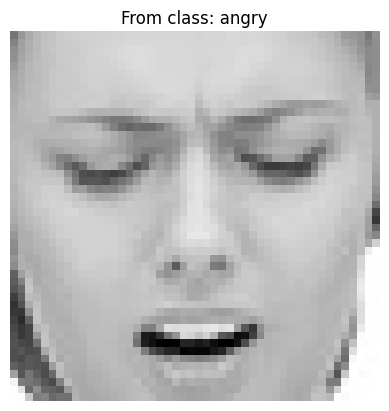

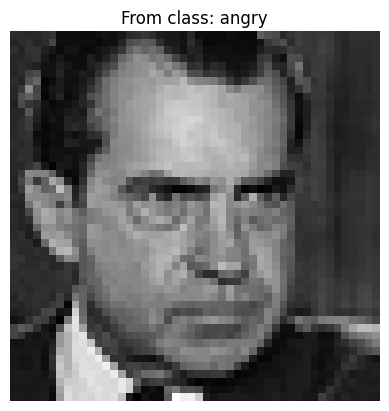

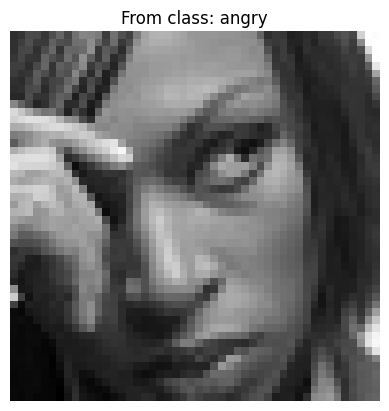

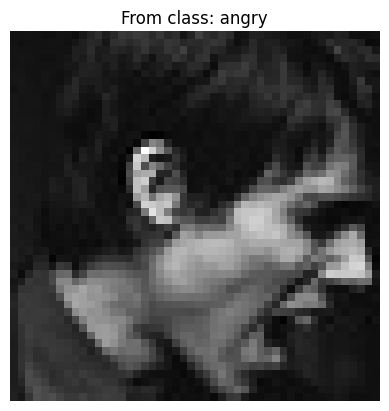

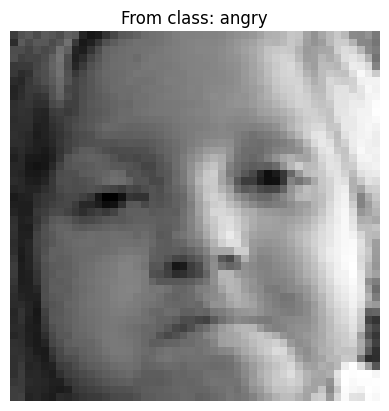

In [13]:
# Preview the images
import matplotlib.pyplot as plt
import os
from PIL import Image

# Manually pick a class and Image
sample_class = os.listdir(train_data)[2]
sample_class_path = os.path.join(train_data, sample_class)

# List the image files inside the class folder
image_files = os.listdir(sample_class_path)

# Load and display the first 2 images
for i in range(5):
    image_path = os.path.join(sample_class_path, image_files[i])
    image = Image.open(image_path).convert('L') # Convert to grayscale
    plt.imshow(image, cmap='gray')
    plt.title(f"From class: {sample_class}")
    plt.axis('off')
    plt.show()

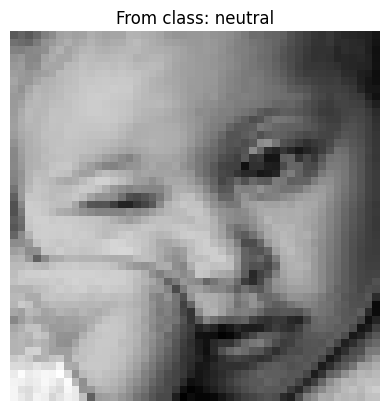

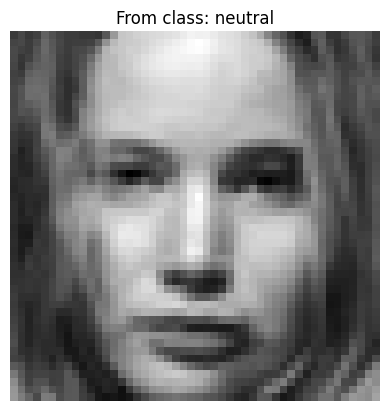

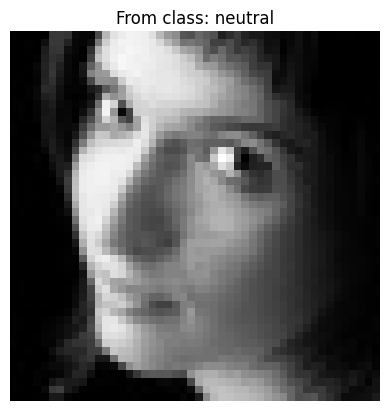

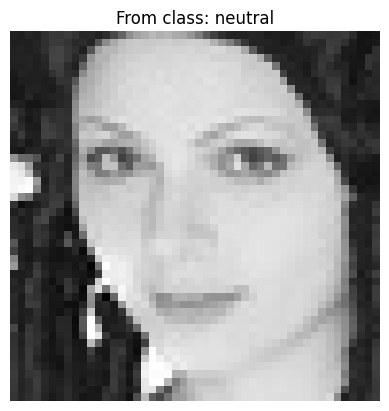

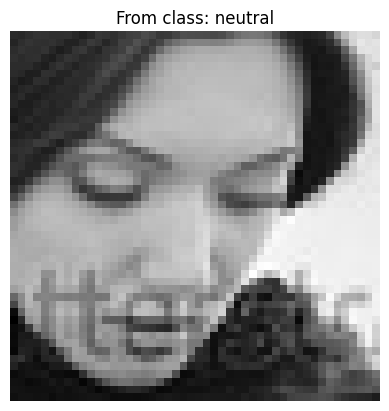

In [14]:
# Preview the images
import matplotlib.pyplot as plt
import os
from PIL import Image

# Manually pick a class and Image
sample_class = os.listdir(train_data)[3]
sample_class_path = os.path.join(train_data, sample_class)

# List the image files inside the class folder
image_files = os.listdir(sample_class_path)

# Load and display the first 2 images
for i in range(5):
    image_path = os.path.join(sample_class_path, image_files[i])
    image = Image.open(image_path).convert('L') # Convert to grayscale
    plt.imshow(image, cmap='gray')
    plt.title(f"From class: {sample_class}")
    plt.axis('off')
    plt.show()

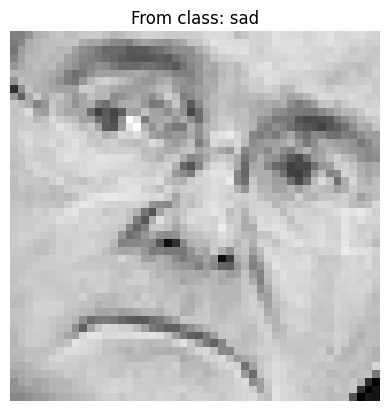

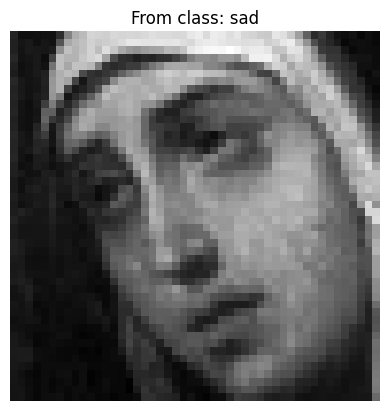

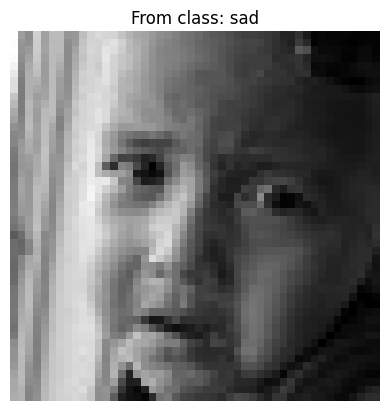

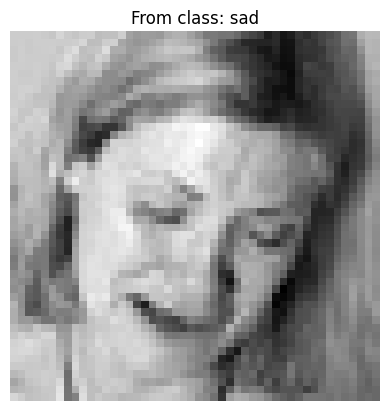

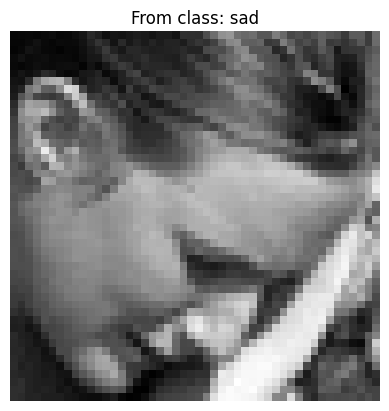

In [15]:
# Preview the images
import matplotlib.pyplot as plt
import os
from PIL import Image

# Manually pick a class and Image
sample_class = os.listdir(train_data)[4]
sample_class_path = os.path.join(train_data, sample_class)

# List the image files inside the class folder
image_files = os.listdir(sample_class_path)

# Load and display the first 2 images
for i in range(5):
    image_path = os.path.join(sample_class_path, image_files[i])
    image = Image.open(image_path).convert('L') # Convert to grayscale
    plt.imshow(image, cmap='gray')
    plt.title(f"From class: {sample_class}")
    plt.axis('off')
    plt.show()

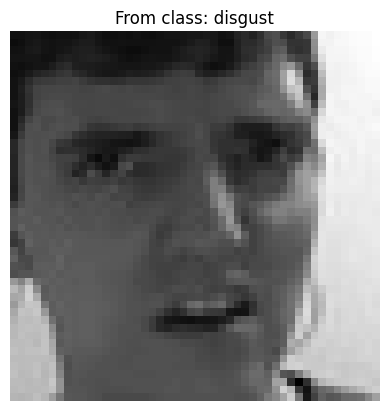

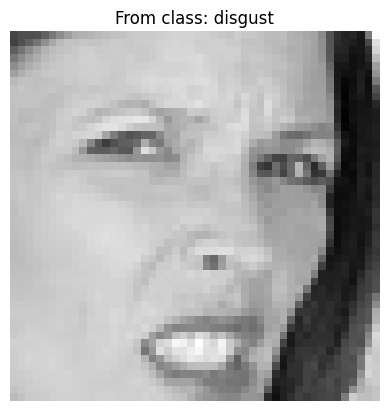

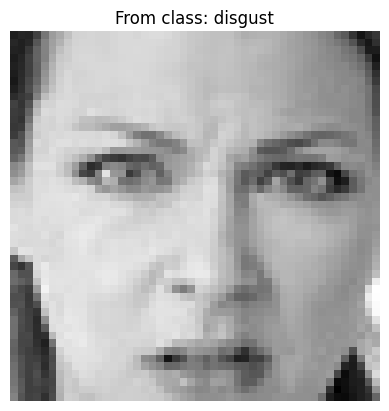

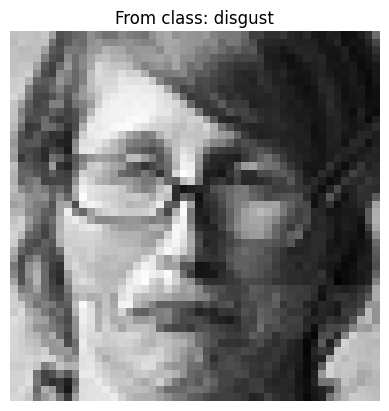

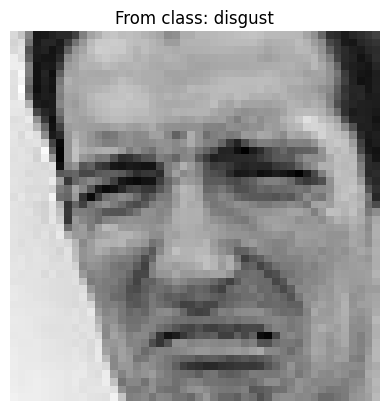

In [16]:
# Preview the images
import matplotlib.pyplot as plt
import os
from PIL import Image

# Manually pick a class and Image
sample_class = os.listdir(train_data)[5]
sample_class_path = os.path.join(train_data, sample_class)

# List the image files inside the class folder
image_files = os.listdir(sample_class_path)

# Load and display the first 2 images
for i in range(5):
    image_path = os.path.join(sample_class_path, image_files[i])
    image = Image.open(image_path).convert('L') # Convert to grayscale
    plt.imshow(image, cmap='gray')
    plt.title(f"From class: {sample_class}")
    plt.axis('off')
    plt.show()

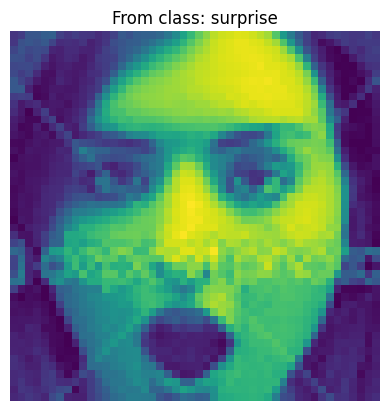

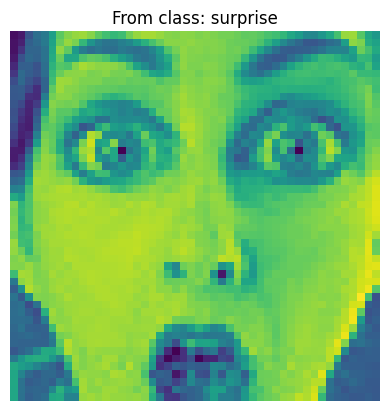

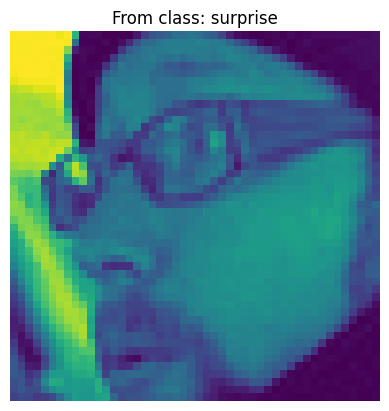

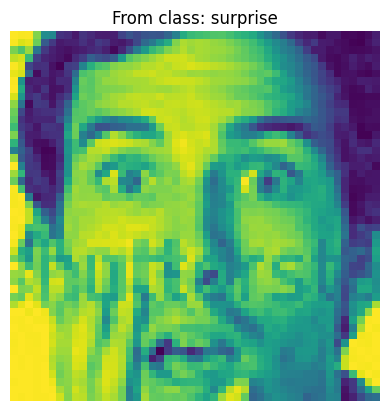

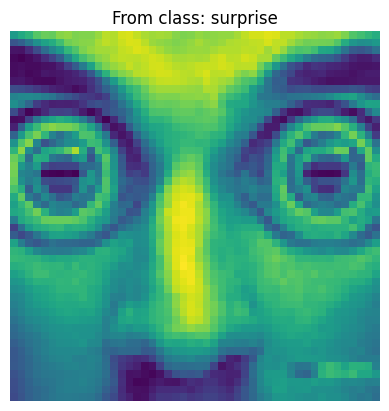

In [17]:
# Preview the images
import matplotlib.pyplot as plt
import os
from PIL import Image

# Manually pick a class and Image
sample_class = os.listdir(train_data)[0]
sample_class_path = os.path.join(train_data, sample_class)

# List the image files inside the class folder
image_files = os.listdir(sample_class_path)

# Load and display the first 2 images
for i in range(5):
    image_path = os.path.join(sample_class_path, image_files[i])
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"From class: {sample_class}")
    plt.axis('off')
    plt.show()

In [25]:
# Step 4: data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 30,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data,
        target_size=(48,48),
        batch_size=32,
        color_mode ="grayscale",
        class_mode ='categorical',
        shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
        test_data,
        target_size=(48,48),
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [29]:
# Model Evaluation
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))


In [30]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Counting the images
def count_images(folder_path):
   return sum([len(files) for _, _, files in os.walk(folder_path)])

train_count = count_images(train_data)
test_count = count_images(test_data)

print('Train count : ' , train_count)
print('Test count : ' , test_count)

Train count :  28709
Test count :  7178


In [33]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_count // 32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=test_count // 32
)

Epoch 1/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 450s 501ms/step - accuracy: 0.3483 - loss: 1.6483 - val_accuracy: 0.4268 - val_loss: 1.4710
Epoch 2/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.5000 - loss: 1.3866 - val_accuracy: 0.4276 - val_loss: 1.4724
Epoch 3/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 447s 470ms/step - accuracy: 0.3976 - loss: 1.5471 - val_accuracy: 0.4643 - val_loss: 1.4046
Epoch 4/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.4688 - loss: 1.4753 - val_accuracy: 0.4593 - val_loss: 1.4054
Epoch 5/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 502s 515ms/step - accuracy: 0.4272 - loss: 1.4631 - val_accuracy: 0.4953 - val_loss: 1.3136
Epoch 6/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.4688 - loss: 1.3523 - val_accuracy: 0.4968 - val_loss: 1.3218
Epoch 7/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 442s 477ms/step - accuracy: 0.4626 - loss: 1.4047 - val_accuracy: 0.5160 - val_loss: 1.2490
Epoch 8/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.5312 - loss: 1

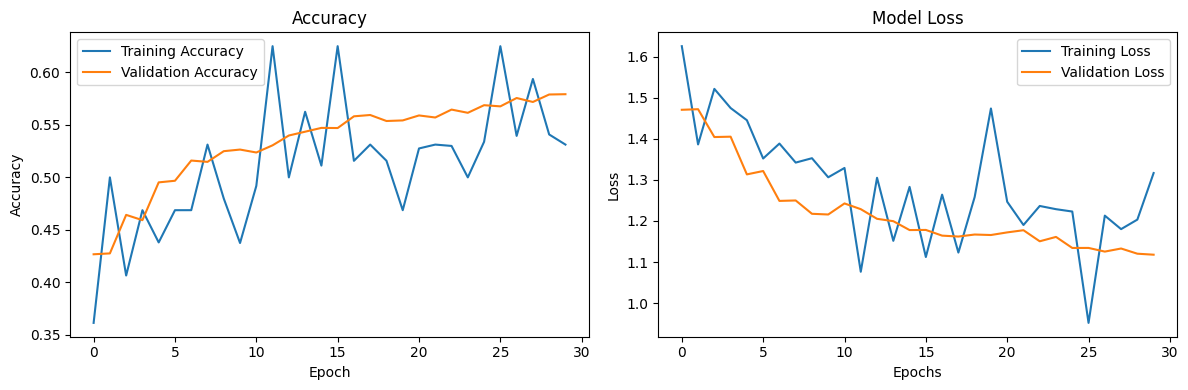

In [34]:
# Plotting the training and validation  accuracy and  loss
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()